# Fitting Neural Networks


## *Bogdan Bošković*


Total points in the assignment add up to 80

# Learning objectives
Through completing this assignment you will be able to...

1. Identify key hyperparameters in neural networks and how they can impact model training and fit

2. Build, tune the parameters of, and apply feed-forward neural networks to data

3. Implement and explain each and every part of a standard fully-connected neural network and its operation including feed-forward propagation, backpropagation, and gradient descent.

4. Apply a standard neural network implementation and search the hyperparameter space to select optimized values.

5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools, so that it can be leveraged for learning about other neural networks of different model architectures.

# 1

## [60 points] Exploring and optimizing neural network hyperparameters
Neural networks have become ubiquitous in the machine learning community, demonstrating exceptional performance over a wide range of supervised learning tasks. The benefits of these techniques come at a price of increased computational complexity and model designs with increased numbers of hyperparameters that need to be correctly set to make these techniques work. It is common that poor hyperparameter choices in neural networks result in significant decreases in model generalization performance. The goal of this exercise is to better understand some of the key hyperparameters you will encounter in practice using neural networks so that you can be better prepared to tune your model for a given application. Through this exercise, you will explore two common approaches to hyperparameter tuning a manual approach where we greedily select the best individual hyperparameter (often people will pick potentially sensible options, try them, and hope it works).

To explore this, we'll be using the example data created below throughout this exercise and the various training, validation, test splits. We will select each set of hyperparameters for our greedy/manual approach, then retrain on the combined training and validation data before finally evaluating our generalization performance for our final model on the test data.

In [1]:
# Some of the network training leads to warnings. When we know and are OK with
#  what's causing the warning and simply don't want to see it, we can use the
#  following code. Run this block
#  to disable warnings
import sys
import os
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = 'ignore'

## Step 1: Create the data


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def makeSincData(n,noise=0.03):
  # Define the grid of points
  x = np.random.uniform(-6,6,n)

  # Calculate the sinc function
  y = np.sinc(np.sqrt((x)**2))+np.random.normal(0, noise, n)

  return (x,y)

# Number of samples
n = 500
noise = 0.001;

# Validation and test data
x_train,y_train = makeSincData(n, noise)
x_val,y_val = makeSincData(n, noise)
x_test,y_test = makeSincData(n, noise)

To help get you started we should always begin by visualizing our training data, here's some code that does that:

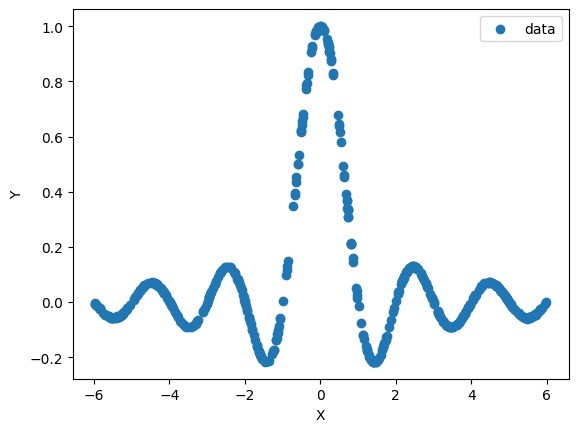

In [3]:
# Visualize the data

# Create the heatmap
plt.scatter(x_train,y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['data'])
plt.show()

The hyperparameters we want to explore control the architecture of our model and how our model is fit to our data. These hyperparameters include the (a) learning rate, (b) batch size, and the (c) model architecture hyperparameters (the number of layers and the number of nodes per layer). We'll explore each of these and determine an optimized configuration of the network for this problem through this exercise. For all of the settings we'll explore and just, we'll assume the following default hyperparameters for the model (we'll use scikit learn's [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) as our neural network model):

- `learning_rate`='constant',  (we don't change learning rate during training)

- `learning_rate_init` = 0.01

- `hidden_layer_sizes` = (20,20) (two hidden layers, each with 20 nodes)

- `alpha` = 0 (regularization penalty - we have not discussed this in class yet)

- `solver` = 'adam' (the adam optimizer)

- `tol` = 1e-5 (this sets the convergence tolerance)

- `early_stopping` = False (this prevents early stopping)

- `activation` = 'relu' (rectified linear unit)

- `n_iter_no_change` = 1000 (this prevents early stopping)

- `batch_size` = 100 (size of the minibatch for adam)

- `max_iter` = 2000 (maximum number of epochs, which is how many times each data point will be used, not the number of gradient steps)

This default setting is our initial guess of what good values may be. Notice there are many model hyperparameters in this list: any of these could potentially be options to search over. We constrain the search to those hyperparameters that are known to have a significant impact on model performance.

**(a) Visualize the impact of different hyperparameter choices on classifier decision boundaries.** Visualize the impact of different hyperparameter settings. Starting with the default settings above make the following changes (only change one hyperparameter at a time). For each hyperparameter value, plot the predictions made by your trained neural network; use 100 uniformly spaced x-values and pass them through your neural network to get y predictions.  Use these 100 $(x,y)$ pairs to create a line plot, and then on the same axes scatter plot the training data (note: you will need to train the model once for each parameter value, resulting in a separate plot for each trained model):

1. Vary the architecture (`hidden_layer_sizes`) by changing the number of nodes per layer while keeping the number of layers constant at 2: (5,5), (20,20), (50,50). Here (X,X) means a 2-layer network with X nodes in each layer.

2. Vary the learning rate: 0.001, 0.01, 0.1

3. Vary the batch size: 20, 100, 500

As you're exploring these settings, visit this website, the [Neural Network Playground](https://playground.tensorflow.org/#activation=relu&batchSize=9&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,1&seed=0.50451&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false&showTestData_hide=false), which will give you the chance to interactively explore the impact of each of these parameters on a similar dataset to the one we use in this exercise. The tool also allows you to adjust the learning rate, batch size, regularization coefficient, and the architecture and to see the resulting decision boundary and learning curves. You can also visualize the model's hidden node output and its weights, and it allows you to add in transformed features as well. Experiment by adding or removing hidden layers and neurons per layer and vary the hyperparameters.

**ANSWER:**

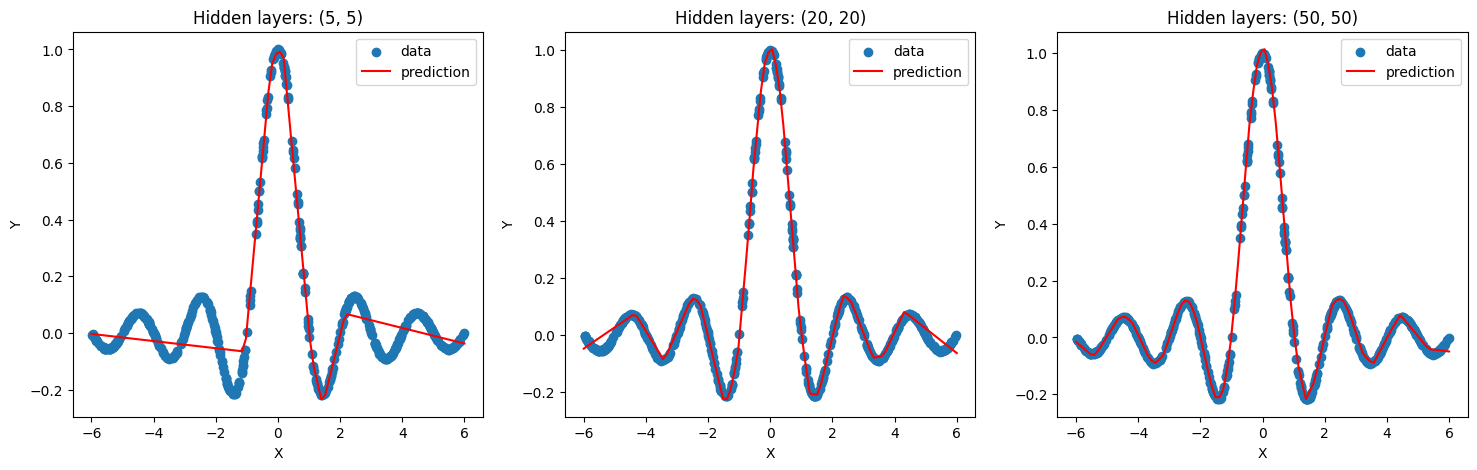

In [4]:
from sklearn.neural_network import MLPRegressor

hidden_layer_sizes = [(5,5), (20,20), (50,50)]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [20, 100, 500]

# exploring hidden layer variations
mlp = MLPRegressor(learning_rate='constant', 
                   alpha=0, solver='adam', 
                   tol=1e-5, 
                   early_stopping=False, 
                   activation='relu', 
                   n_iter_no_change=1000, 
                   max_iter=2000,
                   # to vary later:
                   learning_rate_init=0.01,
                   batch_size=100)

# range of x-values to predict for
x_range = np.linspace(-6,6,100)

# create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18,5), dpi=100)

# iterate over hidden layer sizes
for i, hl in enumerate(hidden_layer_sizes):
    mlp = mlp.set_params(hidden_layer_sizes=hl)
    mlp.fit(x_train.reshape(-1,1), y_train)
    y_hat = mlp.predict(x_range.reshape(-1,1))
    axs[i].scatter(x_train,y_train)
    axs[i].plot(x_range, y_hat, 'r')
    axs[i].set_title('Hidden layers: ' + str(hl))
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend(['data', 'prediction'])
plt.show()

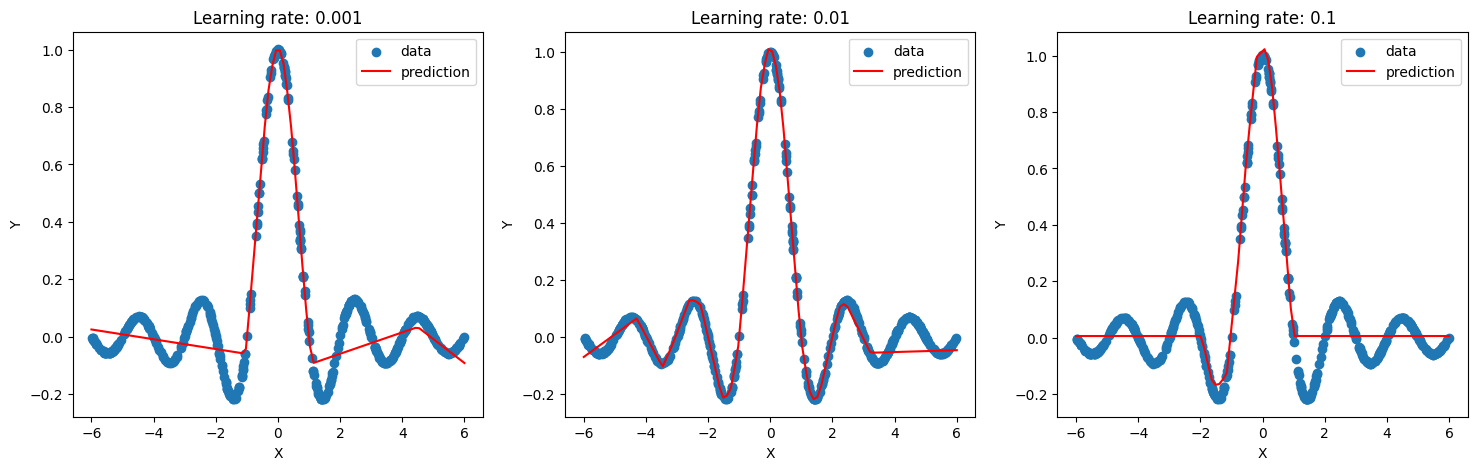

In [5]:
# exploring learning rate variations
mlp = MLPRegressor(learning_rate='constant', 
                   alpha=0, solver='adam', 
                   tol=1e-5, 
                   early_stopping=False, 
                   activation='relu', 
                   n_iter_no_change=1000, 
                   max_iter=2000,
                   hidden_layer_sizes=(20,20),
                   # to vary later:
                   batch_size=100)

# create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18,5), dpi=100)

# iterate over learning rates
for i, lr in enumerate(learning_rates):
    mlp = mlp.set_params(learning_rate_init=lr)
    mlp.fit(x_train.reshape(-1,1), y_train)
    y_hat = mlp.predict(x_range.reshape(-1,1))
    axs[i].scatter(x_train,y_train)
    axs[i].plot(x_range, y_hat, 'r')
    axs[i].set_title('Learning rate: ' + str(lr))
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend(['data', 'prediction'])
plt.show()

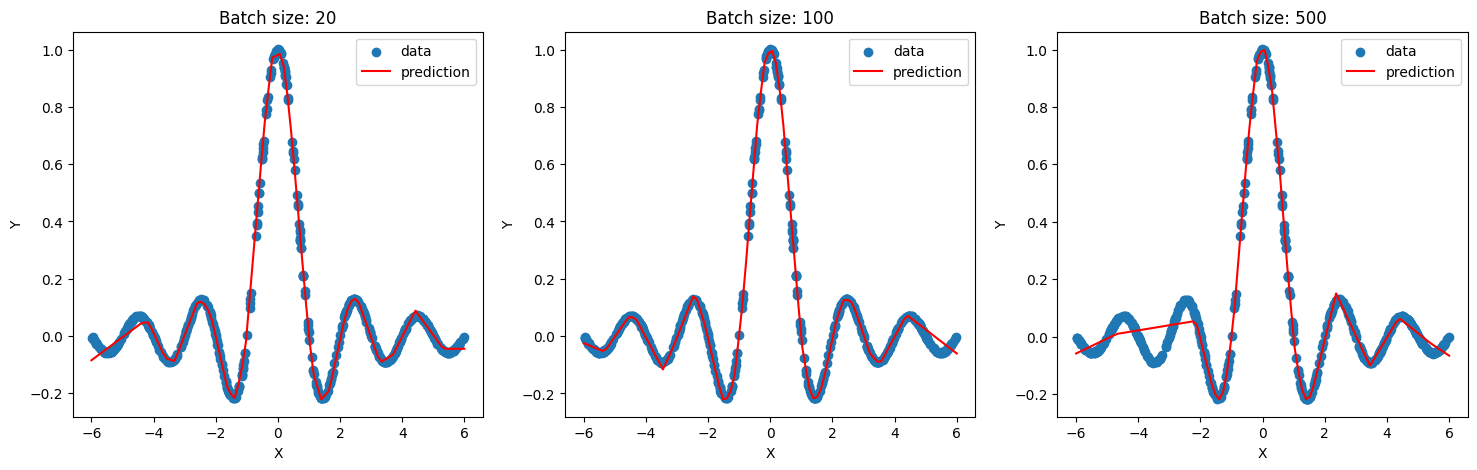

In [6]:
# exploring batch size variations
mlp = MLPRegressor(learning_rate='constant', 
                   alpha=0, solver='adam', 
                   tol=1e-5, 
                   early_stopping=False, 
                   activation='relu', 
                   n_iter_no_change=1000, 
                   max_iter=2000,
                   hidden_layer_sizes=(20,20),
                   learning_rate_init=0.01)

# create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18,5), dpi=100)

# iterate over batch sizes
for i, bs in enumerate(batch_sizes):
    mlp = mlp.set_params(batch_size=bs)
    mlp.fit(x_train.reshape(-1,1), y_train)
    y_hat = mlp.predict(x_range.reshape(-1,1))
    axs[i].scatter(x_train,y_train)
    axs[i].plot(x_range, y_hat, 'r')
    axs[i].set_title('Batch size: ' + str(bs))
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend(['data', 'prediction'])

---

**(b) Manual (greedy) hyperparameter tuning I: manually optimize hyperparameters that govern the learning process, one hyperparameter at a time.** Now with some insight into which settings may work better than others, let's more fully explore the performance of these different settings in the context of our validation dataset through a manual optimization process. Holding all else constant (with the default settings mentioned above), vary each of the following parameters as specified below. Train your algorithm on the training data, and evaluate the performance of your trained algorithm on the validation dataset using mean-squared-error (MSE). Create plots of MSE vs each parameter you vary (this will result in two plots). For full credit, make sure you label the axes, and use a logarithmic y-axis for your plots so it will be easierto see the small differences in MSE between the models.

1. Vary learning rate logarithmically from $10^{-4}$ to $10^{0}$ with 5 uniformly-spaced values

2. Vary the batch size over the following values: $[20,50,100,200,500]$

For each of these cases:

- Based on the results, report your optimal choices for each of these hyperparameters and why you selected them.

- Since neural networks can be sensitive to initialization values, you may notice these plots may be a bit noisy. Consider this when selecting the optimal values of the hyperparameters. If the noise seems significant, run the fit and score procedure multiple times and report the average. Rerunning the algorithm will change the initialization and therefore the output (assuming you do not set a random seed for that algorithm).

- Use the chosen hyperparameter values as the new default settings for section (c) and (d).

**ANSWER:**

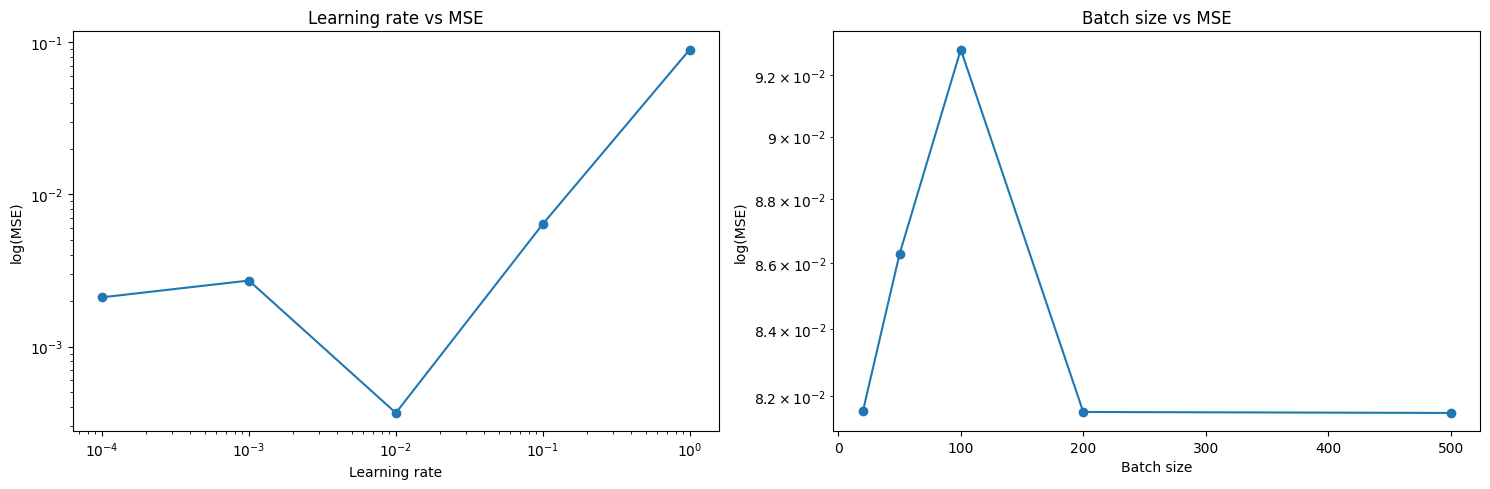

In [7]:
learning_rates = np.logspace(-4, 0, 5)
batch_sizes = [20, 50, 100, 200, 500]

mlp = MLPRegressor(learning_rate='constant', 
                   alpha=0, solver='adam', 
                   tol=1e-5, 
                   early_stopping=False, 
                   activation='relu', 
                   n_iter_no_change=1000, 
                   max_iter=2000,
                   hidden_layer_sizes=(20,20),
                   batch_size=100) 

mses_lr = np.zeros(len(learning_rates))
# exploring learning rate variations with respect to MSE
for i, lr in enumerate(learning_rates):
    mlp = mlp.set_params(learning_rate_init=lr)
    mlp.fit(x_train.reshape(-1,1), y_train)
    y_hat = mlp.predict(x_val.reshape(-1,1))
    mses_lr[i] = np.mean((y_hat - y_val)**2)

mses_bs = np.zeros(len(batch_sizes))
# exploring batch size variations with respect to MSE
for i, bs in enumerate(batch_sizes):
    mlp = mlp.set_params(batch_size=bs)
    mlp.fit(x_train.reshape(-1,1), y_train)
    y_hat = mlp.predict(x_val.reshape(-1,1))
    mses_bs[i] = np.mean((y_hat- y_val)**2)

fig, axs = plt.subplots(1, 2, figsize=(15,5), dpi=100)
axs[0].plot(learning_rates, mses_lr, 'o-')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel('Learning rate')
axs[0].set_ylabel('log(MSE)')
axs[0].set_title('Learning rate vs MSE')
axs[1].plot(batch_sizes, mses_bs, 'o-')
axs[1].set_yscale('log')
axs[1].set_xlabel('Batch size')
axs[1].set_ylabel('log(MSE)')
axs[1].set_title('Batch size vs MSE')
plt.tight_layout()
plt.show()

**Greedily chosen LEARNING RATE:**
As I expected, taking into account the fidelity of the reproduction of the sinc function in the previous step, the MSE is lowest at $10^{-2}$.
The MSE plot with respect to the chosen learning rates was very consistent, and exhibited very little variance.

$$ learning \: rate \: = \: 10^{-2} $$

**Greedily chosen BATCH SIZE:**
MSE variation with respect to varying batch sizes consistently produced schitzophrenic plots. This is to be expected though, with how much initialization could impact different batch sizes on such a small dataset. After having run the above code block about ten times, I cannot say that the final plot above is quite representative of the preceding. What it does share with the previous plots, however, is a consistently low MSE at a batch size of 200. I'm grabbing it while it's still there.

$$ batch \: size \: = \: 200 $$

---

**(c) Manual (greedy) hyperparameter tuning II: manually optimize hyperparameters that impact the model architecture.** Next, we want to explore the impact of the model architecture on performance and optimize its selection. This means varying two parameters at a time instead of one as above. To do this, evaluate the MSE resulting from training the model using each pair of possible numbers of nodes per layer and number of layers from the lists below. We will assume that for any given configuration the number of nodes in each layer is the same (e.g. (2,2,2), which would be a 3-layer network with 2 hidden node in each layer and (10,10) are valid, but (2,5,3) is not because the number of hidden nodes varies in each layer). Use the manually optimized values for learning rate, regularization, and batch size selected from section (b).

- Number of nodes per layer: $[5,10,20,50]$

- Number of hidden layers = $[1,2,3]$

Report the MSE of your model on the validation data. For plotting these results, use heatmaps to plot the data in two dimensions. To make the heatmaps, you can use [this code for creating heatmaps] https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html). Be sure to include the numerical values of the logarithm of the MSE in each grid square, as shown in the linked example and label your x, y, and color axes as always. For these numerical values, round them to **2 decimal places**.

- When you select your optimized parameters, be sure to keep in mind that these values may be sensitive to the data and may offer the potential to have high variance for larger models. Therefore, select the model with the highest accuracy but lowest number of total model weights (all else equal, the simpler model is preferred).

- What do the results show? Which parameters did you select and why?

**ANSWER:**

In [8]:
n_nodes = [5, 10, 20, 50]
n_layers = [1, 2, 3]

# create an array of tuple combinations of n_nodes in n_layers
layer_sizes = [(n,)*l for n in n_nodes for l in n_layers]

mlp = MLPRegressor(learning_rate='constant', 
                   alpha=0, solver='adam', 
                   tol=1e-5, 
                   early_stopping=False, 
                   activation='relu', 
                   n_iter_no_change=1000, 
                   max_iter=2000,
                   learning_rate_init=0.01,
                   batch_size=200)

mses_arch = np.zeros(len(layer_sizes))
# exploring architecture variations with respect to MSE
for i, arch in enumerate(layer_sizes):
    mlp = mlp.set_params(hidden_layer_sizes=arch)
    mlp.fit(x_train.reshape(-1,1), y_train)
    y_hat = mlp.predict(x_val.reshape(-1,1))
    mses_arch[i] = np.mean((y_hat - y_val)**2)

print(layer_sizes)
print(mses_arch)

[(5,), (5, 5), (5, 5, 5), (10,), (10, 10), (10, 10, 10), (20,), (20, 20), (20, 20, 20), (50,), (50, 50), (50, 50, 50)]
[0.0065852  0.00604598 0.08142418 0.00610139 0.00183179 0.00023844
 0.00614366 0.00179331 0.00017673 0.00290707 0.00023191 0.00010377]


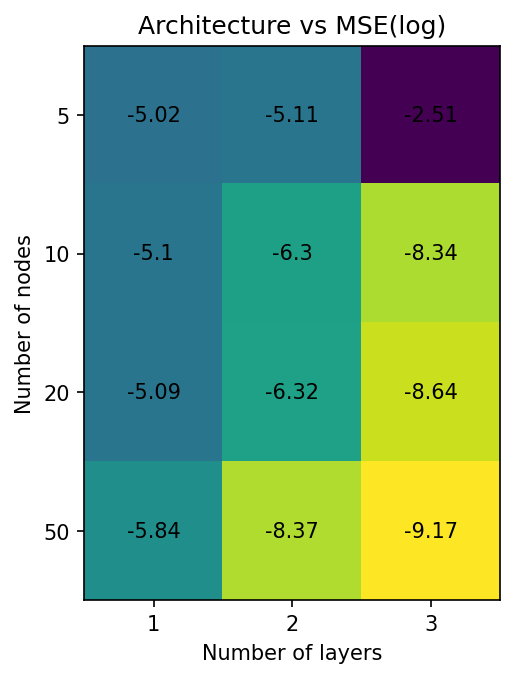

In [9]:
# reshape to have sorted tuples in their own subarrays
# I love Python 
mses_arch = mses_arch.reshape(len(n_nodes), len(n_layers))
# get logarithms of the MSEs
mses_arch_logs = np.log(mses_arch)
# plot the MSEs using a heatmap
fig, axs = plt.subplots(dpi=150)
im = axs.imshow(mses_arch_logs, cmap='viridis_r')
axs.set_xticks(np.arange(len(n_layers)))
axs.set_yticks(np.arange(len(n_nodes)))
axs.set_xticklabels(n_layers)
axs.set_yticklabels(n_nodes)
plt.xlabel('Number of layers')
plt.ylabel('Number of nodes')
for i in range(len(n_nodes)):
    for j in range(len(n_layers)):
        plt.text(j, i, round(mses_arch_logs[i, j], 2), ha='center', va='center', color='black')
plt.title('Architecture vs MSE(log)')
plt.show()

I was told to be greedy, but then told not to be ***too*** greedy. Well, alright then:

$$ chosen \: architecture \: = \: (20, 20, 20)$$

While it is tempting to follow the pretty heatmap and pick the largest architecture, I now know from past experience that larger neural networks can in fact overfit on small enough datasets, like this one. That said, I still have to go with a big one and then insert foot into mouth later.

---

**(d) Manual (greedy) model selection and retraining.** Based the optimal choice of hyperparameters, train your model with your optimized hyperparameters on all the training data AND the validation data.

- Apply the trained model to the test data and report the accuracy of your final model on the test data, in terms of MSE

- Scatter plot the test data and make a line plot using 100 sampled predictions from your model over the $x$-domain of your test data

**ANSWER:**

MSE on test data: 4.948700106115604e-05


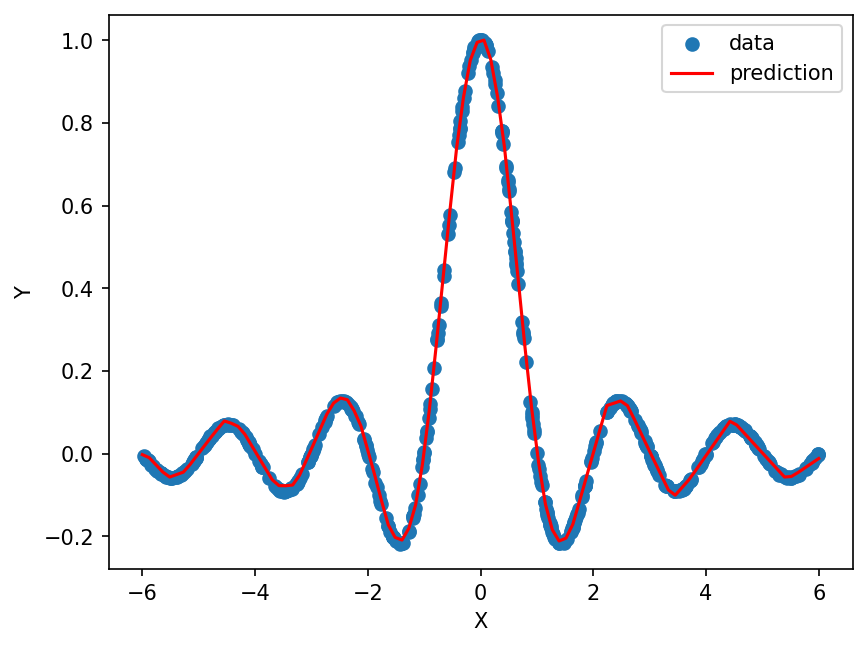

In [10]:
OP_learning_rate = 0.01
OP_batch_size = 200
OP_hidden_layer_sizes = (20,20,20)
# combine train and validation data
x_train_c = np.concatenate((x_train, x_val))
y_train_c = np.concatenate((y_train, y_val))

mlp = MLPRegressor(learning_rate='constant', 
                   alpha=0, solver='adam', 
                   tol=1e-5, 
                   early_stopping=False, 
                   activation='relu', 
                   n_iter_no_change=1000, 
                   max_iter=2000,
                   learning_rate_init=OP_learning_rate,
                   batch_size=OP_batch_size,
                   hidden_layer_sizes=OP_hidden_layer_sizes)

mlp.fit(x_train_c.reshape(-1,1), y_train_c)
y_hat = mlp.predict(x_test.reshape(-1,1))
mse = np.mean((y_hat - y_test)**2)
print('MSE on test data:', mse)

figure = plt.figure(dpi=150)
plt.scatter(x_test,y_test)
# sample 100 predictions from the model
x_range = np.linspace(-6,6,100)
y_hat = mlp.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_hat, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['data', 'prediction'])
plt.show()

Actually pretty beautiful.

$$ greedy \: MSE \: = \: 5 \times 10^{-5} $$

---

# 2

## [20 points] Build and test your own Neural Network for regression

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit` and `predict`. Your `fit` method should run backpropagation on your training data using stochastic gradient descent (SGD, not ADAM!). Assume the activation function is a ReLU. Choose your model architecture to have one input node, two hidden layers with 10 nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but the methods listed below are the minimum required to implement the model cleanly.

**Strategies for debugging**. One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. Here are some recommended tips:

- *Development environment*. Consider using an Integrated Development Environment (IDE). I strongly recommend the use of VS Code and the Python debugging tools in that development environment.

- *Unit tests*. You are strongly encouraged to create unit tests for most modules. Without doing this will make your code extremely difficult to debug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging and is optional, but a unit test is possible).

- *Compare against a similar architecture*. You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model (your model outputs will certainly not be identical, but they should be somewhat similar for similar parameter settings).

**(b)** Apply your neural network.

- Utilize the training and validation datasets from problem 1

- Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time).

- Tune the learning rate and number of training epochs for your model to improve performance as needed.

- In two subplots, plot the training data on one subplot, and the validation data on the other subplot. Use the strategy from problem 1 for plotting a trained model (e.g., create 100 uniformly spaced $x$ values and pass them through the models).

- Report the MSE of your trained MLP. How does the performance of your MLP compare to similar scikit models you trained in problem 1? Are they the same, very similar, or very different?  Why?

**a. ANSWER:**

In [14]:
from neural_net import smol_brain

**b. ANSWER:**



Epoch 0, Loss: 0.7618406847039495
Epoch 100, Loss: 0.04742580297028512
Epoch 200, Loss: 0.046932674303568574
Epoch 300, Loss: 0.027968202665415946
Epoch 400, Loss: 0.016781889362844308
Epoch 500, Loss: 0.01029033760927029
Epoch 600, Loss: 0.008728512740963212
Epoch 700, Loss: 0.006696887271763016
Epoch 800, Loss: 0.006164728199301928
Epoch 900, Loss: 0.0071554025434001
Epoch 1000, Loss: 0.006689587645426467
Epoch 1100, Loss: 0.006409288967814856
Epoch 1200, Loss: 0.005873710077771366
Epoch 1300, Loss: 0.005387926439067328
Epoch 1400, Loss: 0.006108555561773616
Epoch 1500, Loss: 0.005708393875300908
Epoch 1600, Loss: 0.0058427716168921295
Epoch 1700, Loss: 0.005945904399188611
Epoch 1800, Loss: 0.005690276048335192
Epoch 1900, Loss: 0.006150110147296515


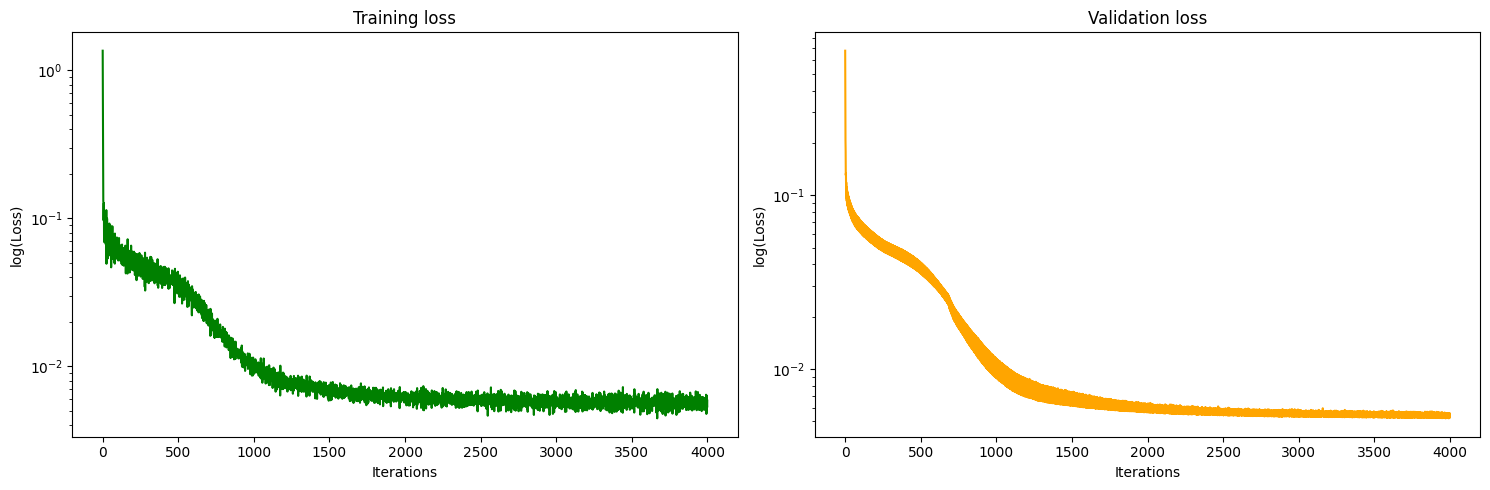

In [17]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

layer_sizes = [1, 20, 20, 20, 1]
smol = smol_brain(layer_sizes=layer_sizes, learning_rate=0.01, max_epochs=2000, batch_size=200)
training_loss, validation_loss = smol.fit(x_train, y_train, x_val, y_val, get_validation_loss=True)

fig, axs = plt.subplots(1, 2, figsize=(15,5), dpi=100)
axs[0].plot(training_loss, 'green')
axs[0].set_yscale('log')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('log(Loss)')
axs[0].set_title('Training loss')
axs[1].plot(validation_loss, 'orange')
axs[1].set_yscale('log')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('log(Loss)')
axs[1].set_title('Validation loss')
plt.tight_layout()
plt.show()

Epoch 0, Loss: 2.2982337701157096
Epoch 100, Loss: 0.055779351545235036
Epoch 200, Loss: 0.047161151665737575
Epoch 300, Loss: 0.04621828312093984
Epoch 400, Loss: 0.032946561293304366
Epoch 500, Loss: 0.030712109811612723
Epoch 600, Loss: 0.02013338034608009
Epoch 700, Loss: 0.0156542450260783
Epoch 800, Loss: 0.013354689069614584
Epoch 900, Loss: 0.010920481128955117
Epoch 1000, Loss: 0.010336273096634485
Epoch 1100, Loss: 0.007283444670718333
Epoch 1200, Loss: 0.006197092038590557
Epoch 1300, Loss: 0.007112519154075264
Epoch 1400, Loss: 0.005806403809745549
Epoch 1500, Loss: 0.005961876431152351
Epoch 1600, Loss: 0.0059707503788556555
Epoch 1700, Loss: 0.006361523984513515
Epoch 1800, Loss: 0.005841042921371702
Epoch 1900, Loss: 0.005745616253440793


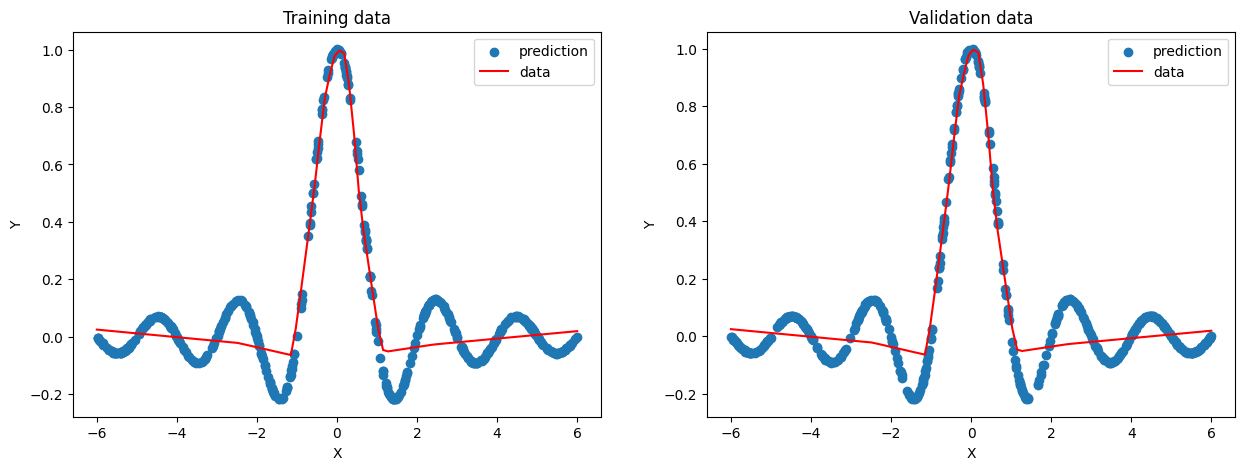

In [18]:
smol = smol_brain(layer_sizes=layer_sizes, learning_rate=0.01, max_epochs=2000, batch_size=200)
smol.fit(x_train, y_train)
x_range = np.linspace(-6,6,100)
y_hat = smol.predict(x_range.reshape(-1,1))

# plot predictoins over training and validation data in two subplots
fig, axs = plt.subplots(1, 2, figsize=(15,5), dpi=100)
axs[0].scatter(x_train, y_train)
axs[0].plot(x_range, y_hat, 'r')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend(['prediction', 'data'])
axs[0].set_title('Training data')
axs[1].scatter(x_val, y_val)
axs[1].plot(x_range, y_hat, 'r')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend(['prediction', 'data'])
axs[1].set_title('Validation data')
plt.show()

In [ ]:
y_hat = smol.predict(x_test.reshape(-1,1))
mse = np.mean((y_hat - y_test)**2)
print('MSE on test data:', mse)

MSE on test data: 0.17071567015837827


Welp, not great but also not quite an even match-up. The MSE on the scikit model was 5e-5, and mine was 1.7e-1. 

My model if run with a (20,20,20) architecture, and batch size of 200 like I ran the scikit model, returned an equivalent MSE to the model which I initialized here, sticking to the prompt architecture of (10,10). The discrepancy in the MSE here comes most likely partly from not using the Adam solver.